## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [ ]:
!pip install pandas_datareader
!pip install quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import quandl 
aapl = quandl.get("WIKI/AAPL", start_date="2017-01-01", end_date="2018-12-31")
aapl

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

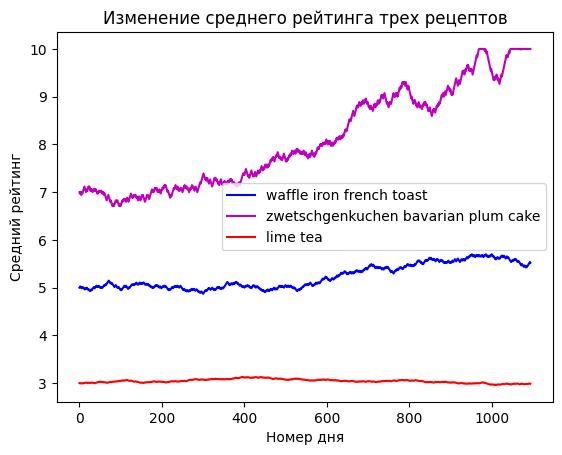

In [ ]:
table = np.load('average_ratings.npy')
days = []
q = 0
for i in range(len(table[0])):
  days.append(q)
  q += 1
days
plt.plot(days, table[0], color='b', label = 'waffle iron french toast')
plt.plot(days, table[1], color='m', label = "zwetschgenkuchen bavarian plum cake")
plt.plot(days, table[2], color='r', label = 'lime tea')

plt.title('Изменение среднего рейтинга трех рецептов')
plt.ylabel('Средний рейтинг')
plt.xlabel('Номер дня')
plt.legend()
# plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


<ipython-input-90-117caed5e079>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  years = pd.date_range(start='1/1/2019', end='30/12/2021')


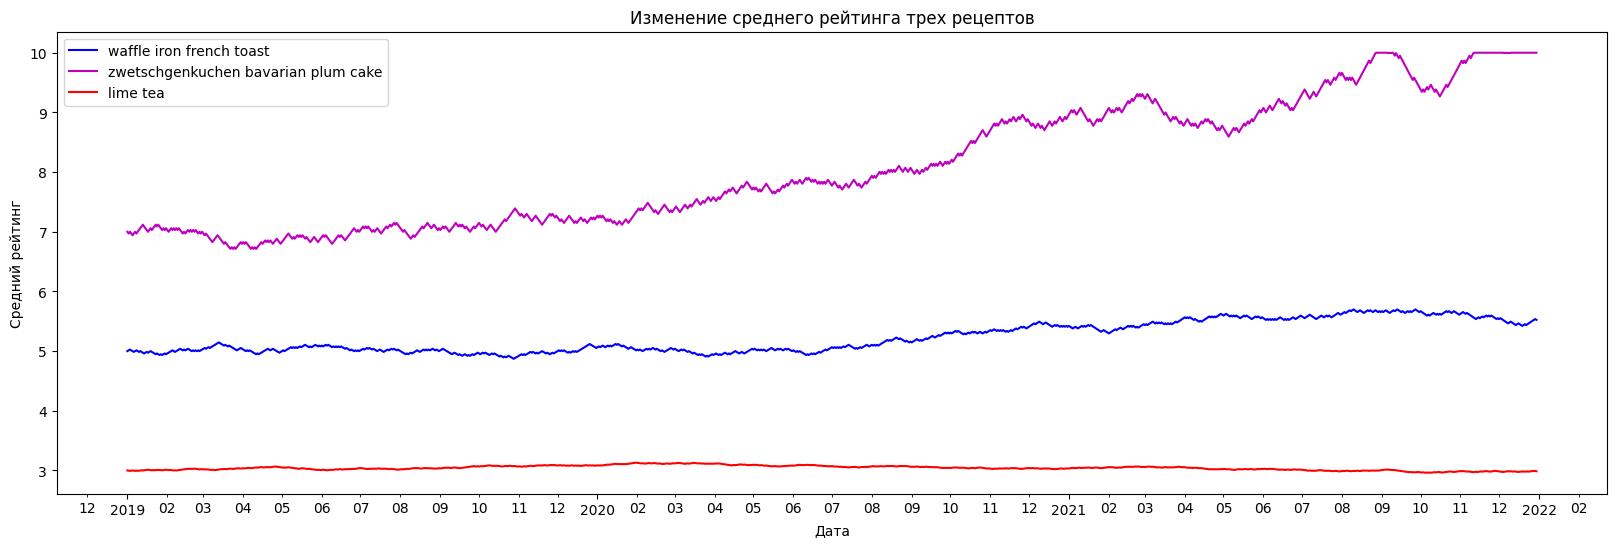

In [ ]:
years = pd.date_range(start='1/1/2019', end='30/12/2021')

fig, axs = plt.subplots(figsize=(20, 6))
axs.plot(years, table[0], color='b', label = 'waffle iron french toast')
axs.plot(years, table[1], color='m', label = "zwetschgenkuchen bavarian plum cake")
axs.plot(years, table[2], color='r', label = 'lime tea')
axs.xaxis.set_major_locator(mdates.YearLocator())
axs.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=None))
axs.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
plt.title('Изменение среднего рейтинга трех рецептов')
plt.ylabel('Средний рейтинг')
plt.xlabel('Дата')
plt.legend()
plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

<ipython-input-133-3381b186f97e>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  years = pd.date_range(start='1/1/2019', end='30/12/2021')


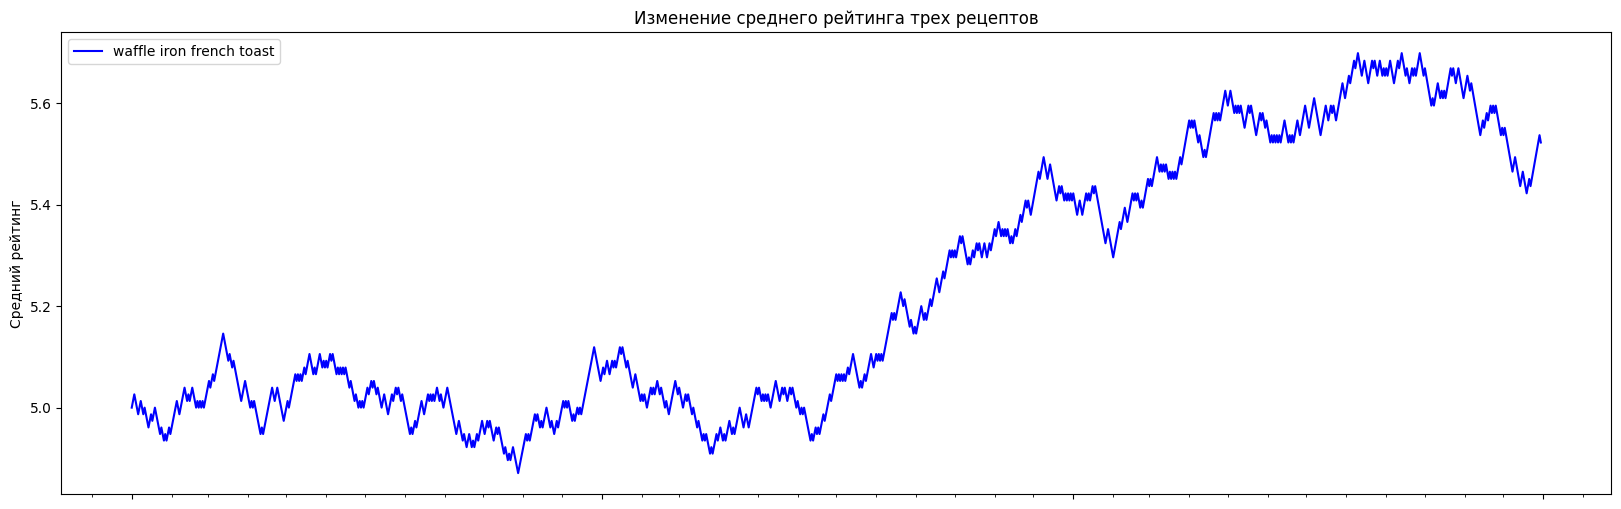

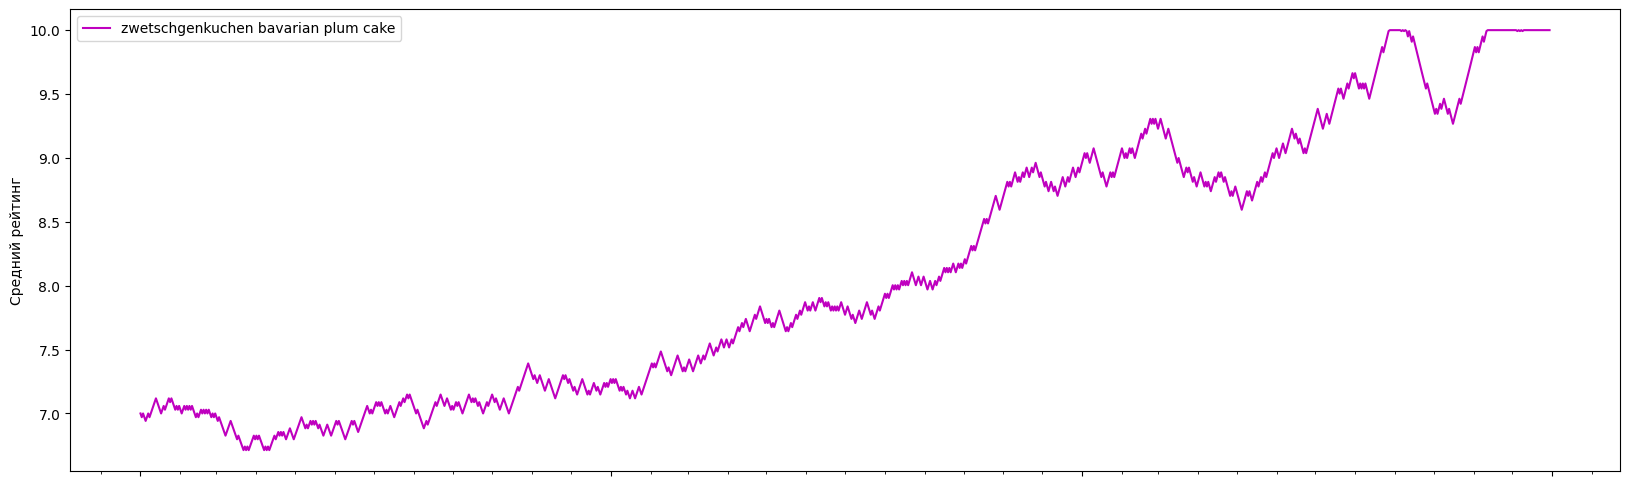

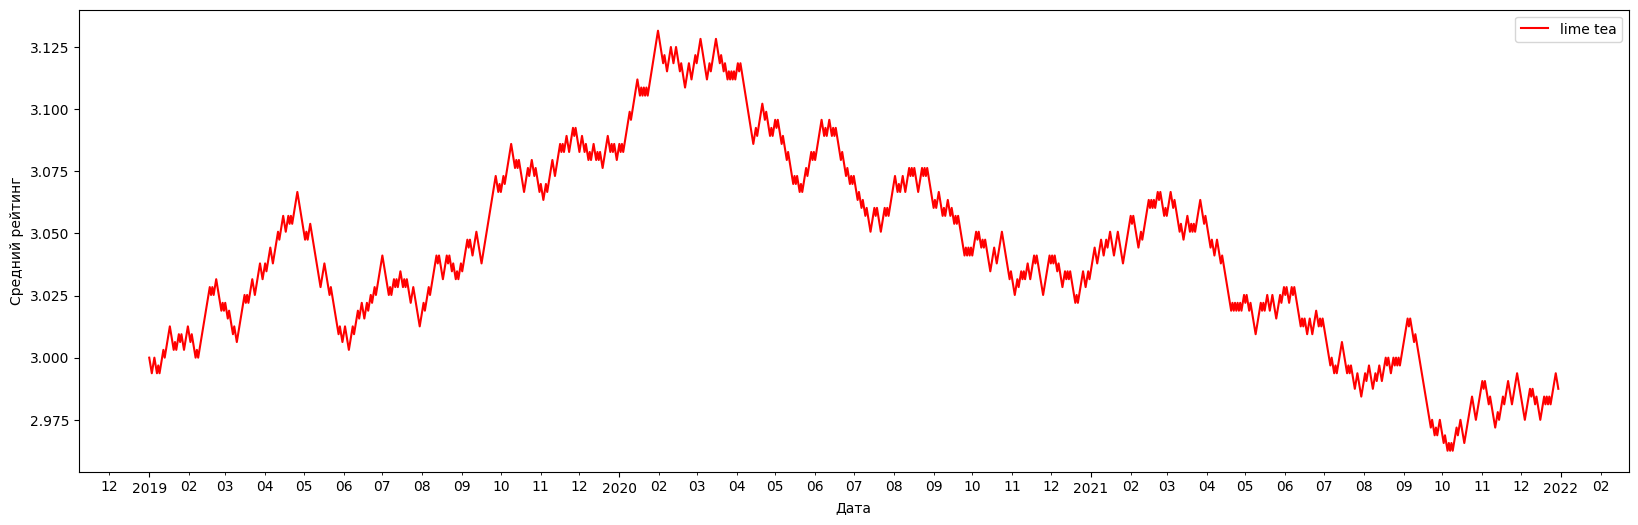

In [ ]:
years = pd.date_range(start='1/1/2019', end='30/12/2021')
labels = ['waffle iron french toast', "zwetschgenkuchen bavarian plum cake", 'lime tea']
colors  = ['b', 'm', 'r']

for i in range(3):
    fig, axs = plt.subplots(figsize=(20, 6))
    plt.plot(years, table[i], color=colors[i], label = labels[i])
    plt.legend()
    plt.ylabel('Средний рейтинг')

    if i != 2:
      if i == 0:
        plt.title('Изменение среднего рейтинга трех рецептов')
      axs.xaxis.set_major_locator(mdates.YearLocator())
      axs.xaxis.set_ticklabels([])
      axs.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=None))
      plt.show()
    else:
      axs.xaxis.set_major_locator(mdates.YearLocator())
      axs.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=None))
      axs.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
      plt.xlabel('Дата')
      plt.show()


4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


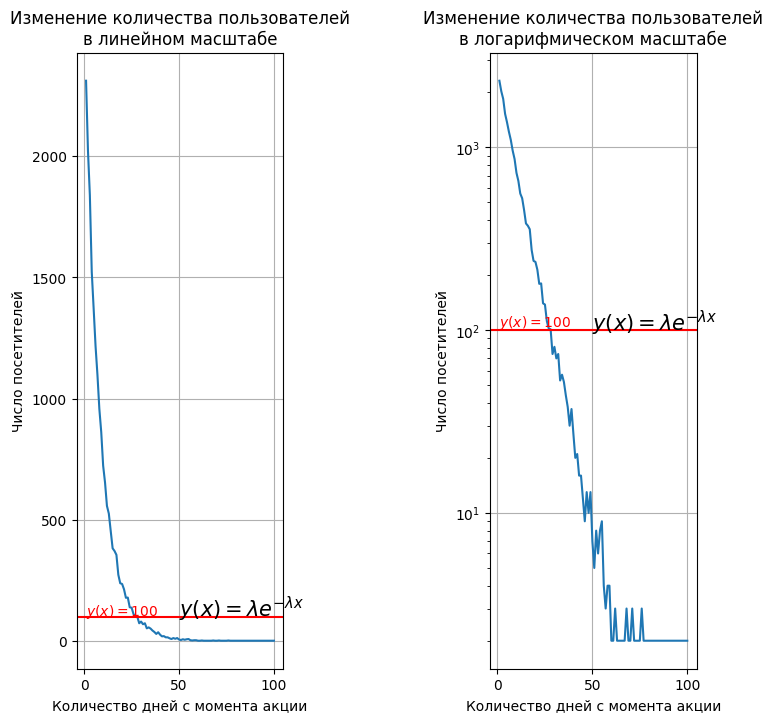

In [ ]:
visitors = np.load('visitors.npy')
days = np.arange(1, 101)
fig, axs = plt.subplots(1, 2, figsize=(8, 8))

for i in range(2):
  axs[i].plot(days, visitors)
  axs[i].set_xlabel('Количество дней с момента акции')
  axs[i].set_ylabel('Число посетителей')
  axs[i].axhline(y=100, color='red')
  axs[i].text(1, 105, r'$y(x) = 100$', color='red')
  axs[i].text(50, 100, r'$y(x) = \lambda e^{-\lambda x}$', fontsize=15)
  axs[i].grid(True)

axs[0].set_title('Изменение количества пользователей\nв линейном масштабе')
axs[1].set_title('Изменение количества пользователей\nв логарифмическом масштабе')
axs[1].set_yscale('log')

plt.subplots_adjust(wspace=1.0)
plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [ ]:
import pandas as pd

recipes = pd.read_csv("recipes_sample.csv", delimiter = ',')
reviews = pd.read_csv("reviews_sample.csv", delimiter = ',')

In [ ]:
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN


In [ ]:
reviews

,Unnamed: 0,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...,...
126691,1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
126692,158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
126693,1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
126694,453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

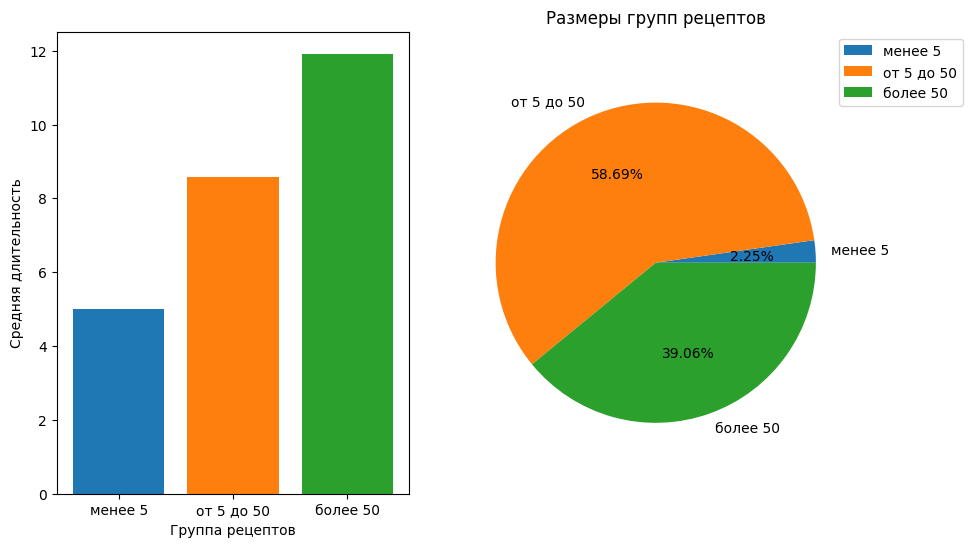

In [ ]:
recipes["duration"] = pd.cut(recipes["minutes"], bins=[0, 5, 50, float("inf")], labels=["менее 5", "от 5 до 50", "более 50"])
grouped_df = recipes.groupby("duration").agg({"n_steps": "mean", "name": "size"})

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
grouped_df["n_steps"].plot(kind="bar", ax=ax1)
ax1.set_xlabel("Группа рецептов")
ax1.set_ylabel("Средняя длительность")

wedges, texts, autotexts = plt.pie(vals, labels=groups, autopct='%1.2f%%')
ax2.set_title("Размеры групп рецептов")

plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

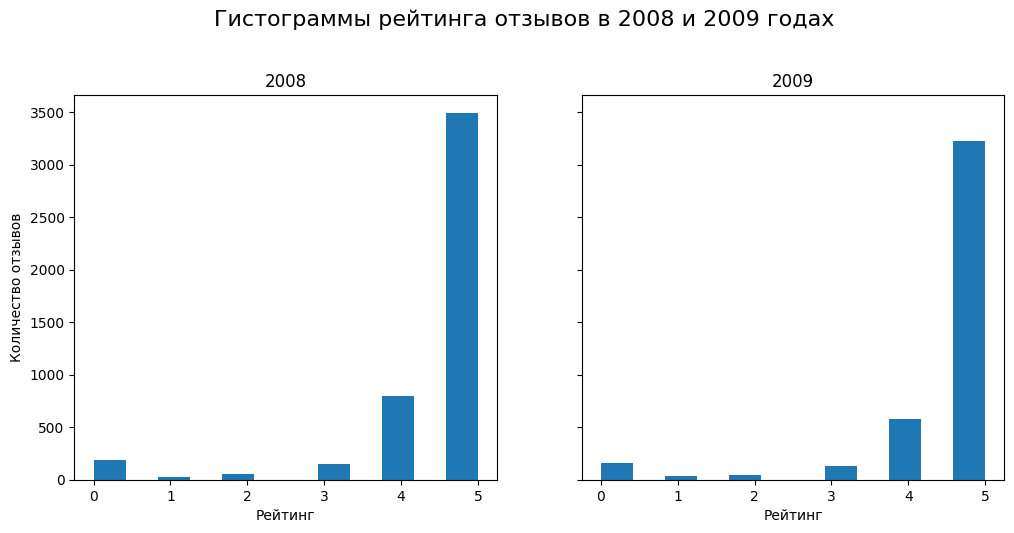

In [ ]:
table1 = reviews[(reviews['date'] >= '2008-1-1') & (reviews['date'] <= '2008-12-31')]
table2 = reviews[(reviews['date'] >= '2009-1-1') & (reviews['date'] <= '2009-12-31')]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax1.hist(table1['rating'], bins=12)
ax1.set_title('2008')
ax1.set_xlabel('Рейтинг')
ax1.set_ylabel('Количество отзывов')

ax2.hist(table2['rating'], bins=12)
ax2.set_title('2009')
ax2.set_xlabel('Рейтинг')

plt.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах', fontsize=16, y=1.05)

plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

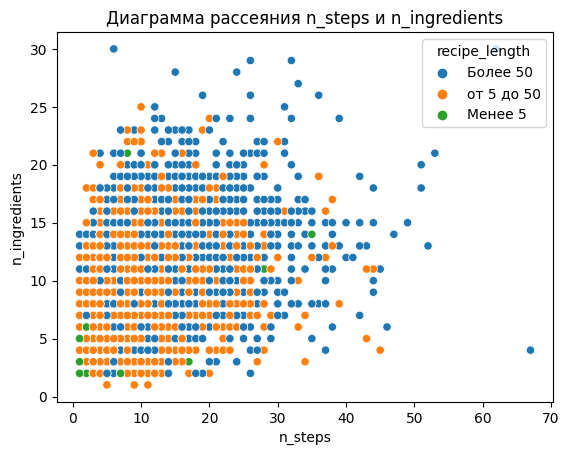

In [ ]:
def length(row):
    if row['minutes'] < 5:
        return 'Менее 5'
    elif row['minutes'] >= 5 and row['minutes'] < 50:
        return 'от 5 до 50'
    else:
        return 'Более 50'
recipes['recipe_length'] = recipes.apply(length, axis=1)

sns.scatterplot(data=recipes,x = 'n_steps',y = 'n_ingredients', hue='recipe_length')
plt.title('Диаграмма рассеяния n_steps и n_ingredients')
plt.show()


8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')

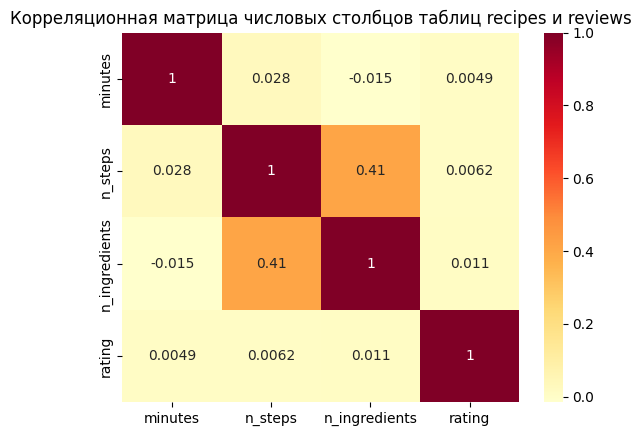

In [ ]:
messi = recipes.join(reviews)
df = pd.DataFrame(messi, columns = ["minutes", "n_steps", "n_ingredients", "rating"])
df1 = df.corr()
sns.heatmap(df1, annot = True, cmap = 'YlOrRd')
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')